# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)
URL="INNHotelsGroup.csv"
data = pd.read_csv(URL)

## Data Overview

- Observations
- Sanity checks

In [2]:
data.shape #tells us number of columns and rows

(36275, 19)

In [3]:
data.describe(include='all').T #tell us stats of data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN09482,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.0,NaN,NaN,NaN,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,NaN,NaN,NaN,0.105279,0.402648,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.2043,1.410905,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.0,NaN,NaN,NaN,0.030986,0.173281,0.0,0.0,0.0,0.0,1.0
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.0,NaN,NaN,NaN,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,NaN,NaN,NaN,2017.820427,0.383836,2017.0,2018.0,2018.0,2018.0,2018.0


In [12]:
data.info() #counts nulls and shows datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

There are no null values in the data set. We have 36275 rows and 19 columns. 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

<AxesSubplot:xlabel='avg_price_per_room', ylabel='booking_status'>

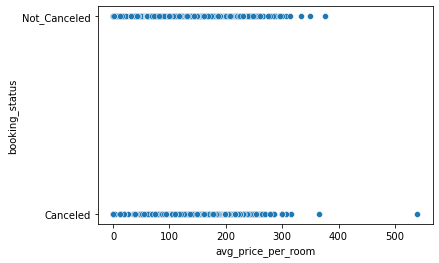

In [13]:
sns.scatterplot(x="avg_price_per_room", y='booking_status', data = data) 
#plotting variables against booking status to look for clear patterns in booking status and driver variables


<AxesSubplot:xlabel='no_of_special_requests', ylabel='booking_status'>

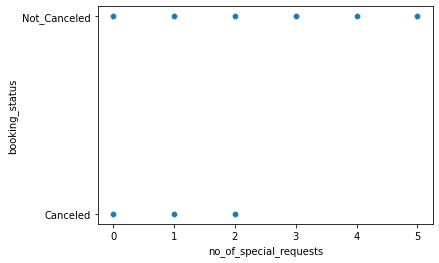

In [14]:
sns.scatterplot(x="no_of_special_requests", y='booking_status', data = data)


<AxesSubplot:xlabel='no_of_week_nights', ylabel='booking_status'>

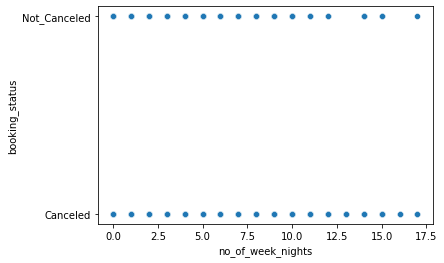

In [15]:
sns.scatterplot(x="no_of_week_nights", y='booking_status', data = data)


In [16]:
data.groupby(['repeated_guest', 'booking_status']).size()  #see how many repeated guests cancel vs first time guests

repeated_guest  booking_status
0               Canceled          11869
                Not_Canceled      23476
1               Canceled             16
                Not_Canceled        914
dtype: int64

Repeated guests clearly do not cancel very often, whereas many first time guests seem to cancel

In [17]:
data.groupby(['room_type_reserved', 'booking_status']).size()

room_type_reserved  booking_status
Room_Type 1         Canceled           9072
                    Not_Canceled      19058
Room_Type 2         Canceled            228
                    Not_Canceled        464
Room_Type 3         Canceled              2
                    Not_Canceled          5
Room_Type 4         Canceled           2069
                    Not_Canceled       3988
Room_Type 5         Canceled             72
                    Not_Canceled        193
Room_Type 6         Canceled            406
                    Not_Canceled        560
Room_Type 7         Canceled             36
                    Not_Canceled        122
dtype: int64

From this, it looks those with the higher room type and the lowest room type are most likely to cancel, but hard to say just from looking at this data.

In [18]:
data.groupby(['market_segment_type', 'booking_status']).size()

market_segment_type  booking_status
Aviation             Canceled             37
                     Not_Canceled         88
Complementary        Not_Canceled        391
Corporate            Canceled            220
                     Not_Canceled       1797
Offline              Canceled           3153
                     Not_Canceled       7375
Online               Canceled           8475
                     Not_Canceled      14739
dtype: int64

Again, hard to tell if there are any patterns just by looking at the data, but it seems complimentary and corporate rooms are the least likely to cancel. No one canceled a complimentary room.

<AxesSubplot:xlabel='no_of_previous_cancellations', ylabel='booking_status'>

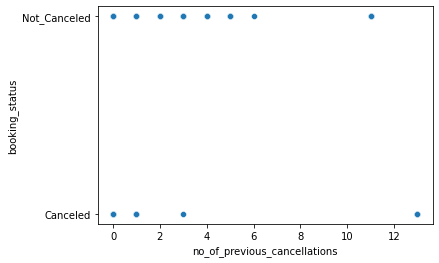

In [19]:
sns.scatterplot(x="no_of_previous_cancellations", y='booking_status', data = data) 


It seems that those who have many cancellations in the past, did not cancel often in our dataset. This could likely be because most people don't have that many cancellations and the density is high in the 0-2 range.

<AxesSubplot:xlabel='no_of_previous_cancellations', ylabel='count'>

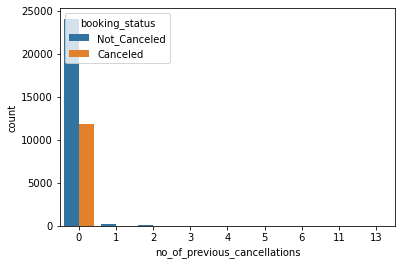

In [20]:
sns.countplot(x="no_of_previous_cancellations", hue='booking_status', data = data) 


We can see from the countplot that most people have never cancelled before, and high cancellations are an outlier.

<AxesSubplot:xlabel='no_of_previous_bookings_not_canceled', ylabel='booking_status'>

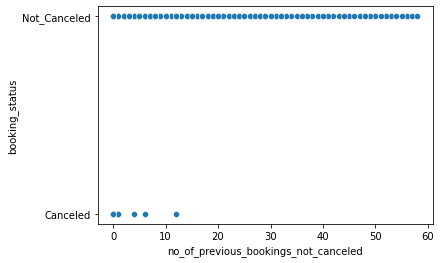

In [21]:
sns.scatterplot(x="no_of_previous_bookings_not_canceled", y='booking_status', data = data) 


<AxesSubplot:xlabel='no_of_previous_bookings_not_canceled', ylabel='booking_status'>

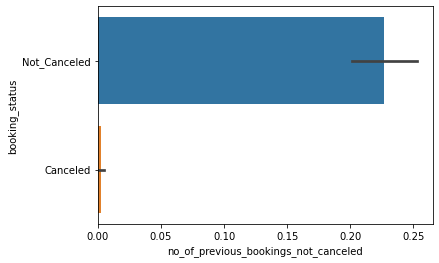

In [22]:
sns.barplot(x="no_of_previous_bookings_not_canceled", y='booking_status', data = data) 

it appears that those who have a high number of bookings do not cancel very often

<AxesSubplot:xlabel='arrival_month', ylabel='booking_status'>

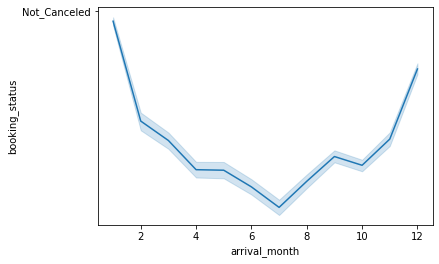

In [23]:
 sns.lineplot(x="arrival_month", y='booking_status', data = data)    

We can see from this data, people are most likely to cancel during the cold seasons and not likely to cancel during the summer

In [24]:
data['booking_status'].value_counts() #tells us total number of booking cancellations

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [25]:
data['arrival_month'].value_counts() #tells us total number of bookings for every month

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

In [26]:
data['market_segment_type'].value_counts() #tells us total number of booking cancellations

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

<AxesSubplot:xlabel='market_segment_type', ylabel='avg_price_per_room'>

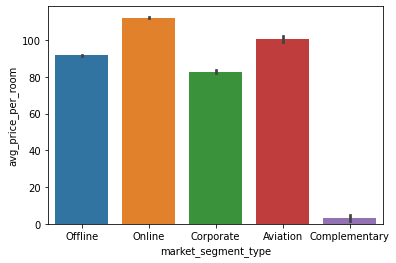

In [27]:
sns.barplot(x='market_segment_type',y='avg_price_per_room', data=data) 

In [28]:
canceled = data[(data['booking_status']=='Canceled')] #slices data to assign all canceled bookings to canceled variable
booking = data['booking_status'].value_counts().sum() #counts total number of bookings and assigns to booking variable
#print(canceled.value_counts().sum()/booking) #divides canceled by total bookings
print('The percentage of cancellations is',str(((canceled.value_counts().sum()/booking)*100))+'%')



The percentage of cancellations is 32.76361130254997%


In [29]:
rgc = data.groupby(['repeated_guest'])['booking_status'].value_counts()
float = "{:.2f}".format(16/930*100)
print('The percentage of repeated guests who cancel is', (float)+'%')

The percentage of repeated guests who cancel is 1.72%


In [30]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


[Text(0.5, 0, 'Number of Special Requests'),
 Text(0, 0.5, 'Avg Price Per Room')]

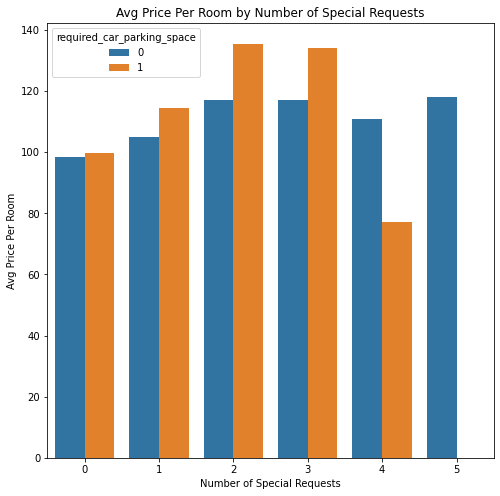

In [31]:
fig, ax = plt.subplots(figsize = (8,8))
ax = sns.barplot(x = 'no_of_special_requests', y = 'avg_price_per_room', data=data, hue = 'required_car_parking_space',ci=None)
ax.set_title("Avg Price Per Room by Number of Special Requests")
ax.set(xlabel = 'Number of Special Requests',ylabel='Avg Price Per Room')

In [32]:
bs = data[data.booking_status == 'Canceled']

In [33]:
bs.groupby('no_of_week_nights').count()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_week_nights,,,,,,,,,,,,,,,,,,
0,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679
1,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572
2,3997,3997,3997,3997,3997,3997,3997,3997,3997,3997,3997,3997,3997,3997,3997,3997,3997,3997
3,2574,2574,2574,2574,2574,2574,2574,2574,2574,2574,2574,2574,2574,2574,2574,2574,2574,2574
4,1143,1143,1143,1143,1143,1143,1143,1143,1143,1143,1143,1143,1143,1143,1143,1143,1143,1143
5,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632
6,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88
7,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
8,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32


In [34]:
bs.groupby('no_of_weekend_nights').count()

,Booking_ID,no_of_adults,no_of_children,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_weekend_nights,,,,,,,,,,,,,,,,,,
0,5093,5093,5093,5093,5093,5093,5093,5093,5093,5093,5093,5093,5093,5093,5093,5093,5093,5093
1,3432,3432,3432,3432,3432,3432,3432,3432,3432,3432,3432,3432,3432,3432,3432,3432,3432,3432
2,3157,3157,3157,3157,3157,3157,3157,3157,3157,3157,3157,3157,3157,3157,3157,3157,3157,3157
3,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74
4,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
5,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
6,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [35]:
bs.groupby('type_of_meal_plan').count()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
type_of_meal_plan,,,,,,,,,,,,,,,,,,
Meal Plan 1,8679,8679,8679,8679,8679,8679,8679,8679,8679,8679,8679,8679,8679,8679,8679,8679,8679,8679
Meal Plan 2,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506
Meal Plan 3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Not Selected,1699,1699,1699,1699,1699,1699,1699,1699,1699,1699,1699,1699,1699,1699,1699,1699,1699,1699


In [36]:
bs.groupby('arrival_month').count()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
arrival_month,,,,,,,,,,,,,,,,,,
1,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
2,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430
3,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700
4,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995
5,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948
6,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291
7,1314,1314,1314,1314,1314,1314,1314,1314,1314,1314,1314,1314,1314,1314,1314,1314,1314,1314
8,1488,1488,1488,1488,1488,1488,1488,1488,1488,1488,1488,1488,1488,1488,1488,1488,1488,1488
9,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538


In [183]:
bs.groupby('no_of_special_requests').count()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,booking_status
no_of_special_requests,,,,,,,,,,,,,,,,,,
0,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545
1,2703,2703,2703,2703,2703,2703,2703,2703,2703,2703,2703,2703,2703,2703,2703,2703,2703,2703
2,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637


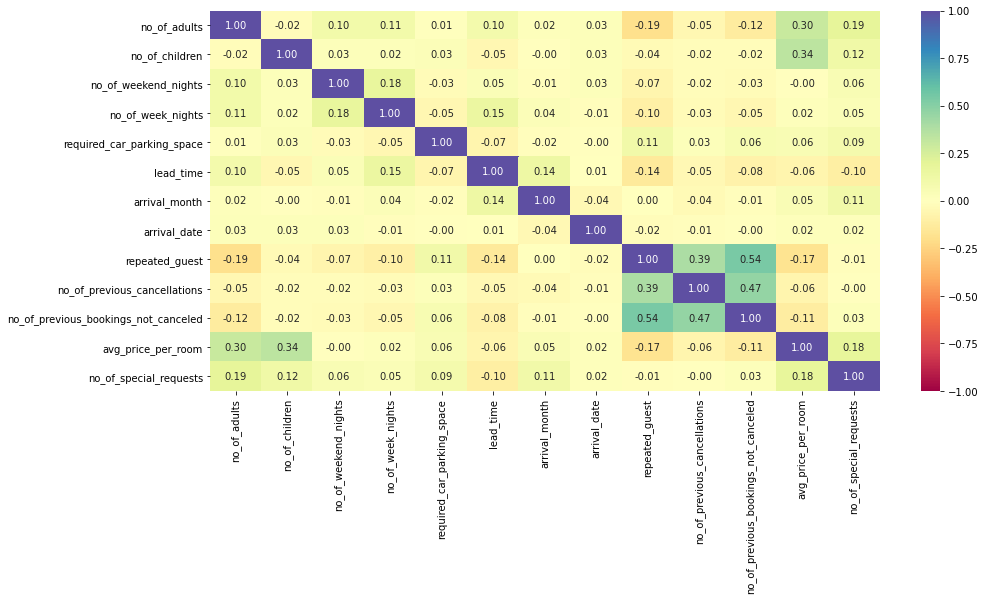

In [37]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("arrival_year") 

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

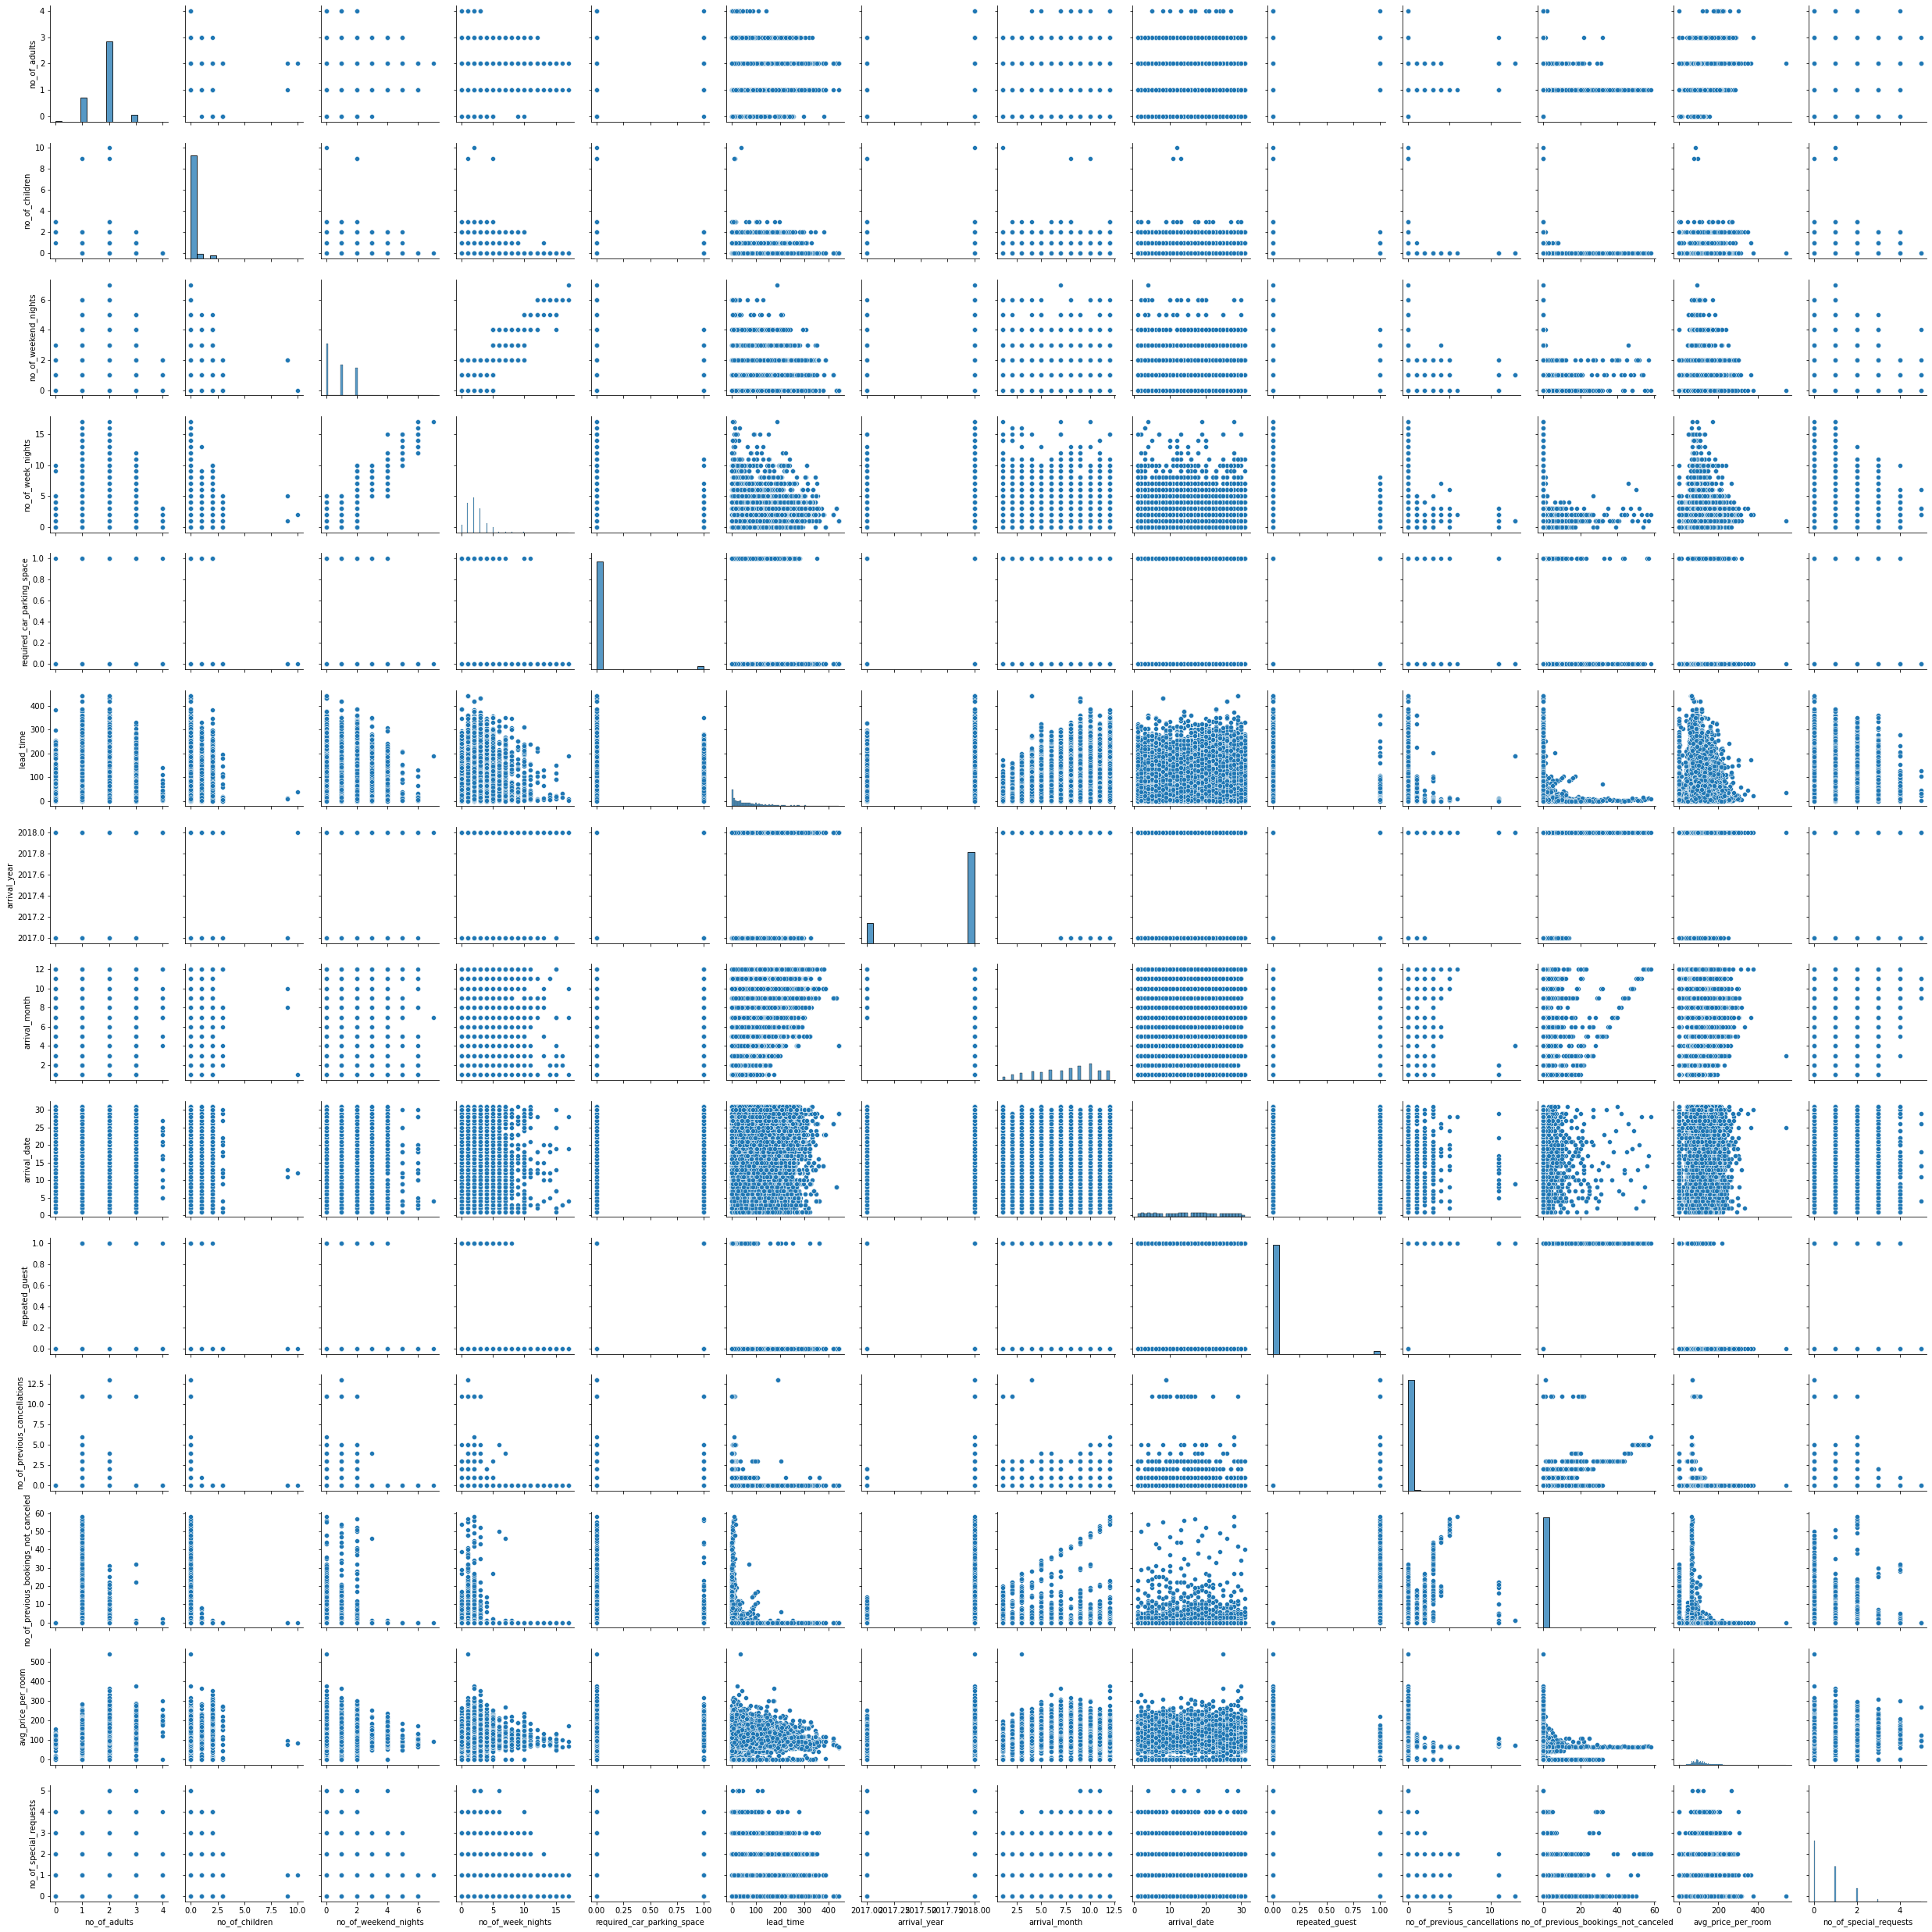

In [38]:
sns.pairplot(data=data)

## Insights
The busiest months in the hotel are the summer months, espcially July. Most of the guests come from the Online market segment. The room prices in different market segments vary with Online spending the most, corporate the least and obviously complementary being free. About 32.76% of all bookings are cancelled. Only 1.72% of repeated guests cancel.  It doesn't seem that special requirements affects booking cancellation from the data, however, it appears the more special requests they make may influence them not to cancel. But this could just be due to volume.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [4]:
df = data.copy() #creating a df copy just in case of errors

In [40]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [41]:
df.isnull().sum() #check for null values

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [42]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer 

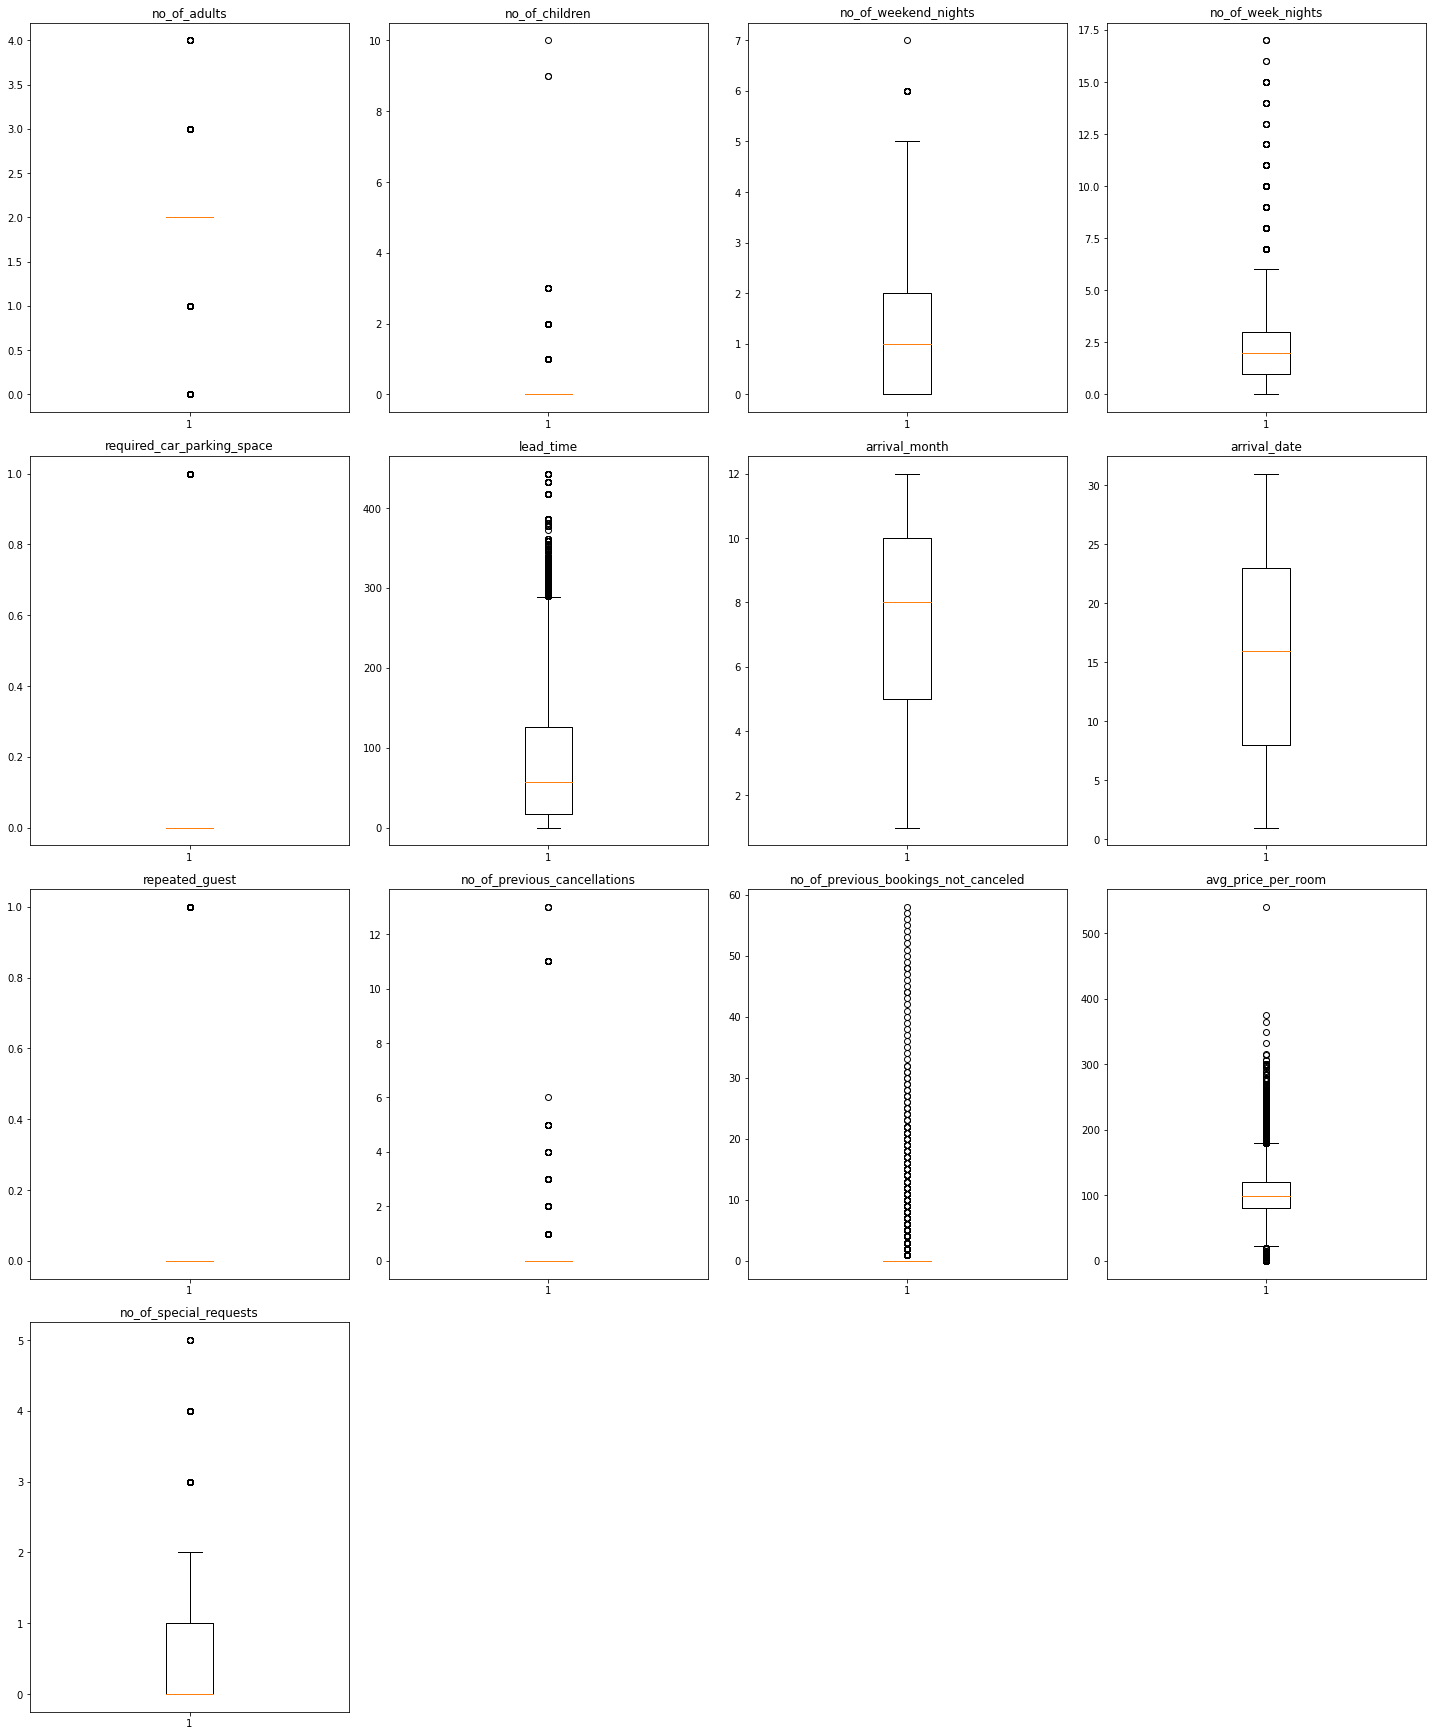

In [43]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [44]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [45]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

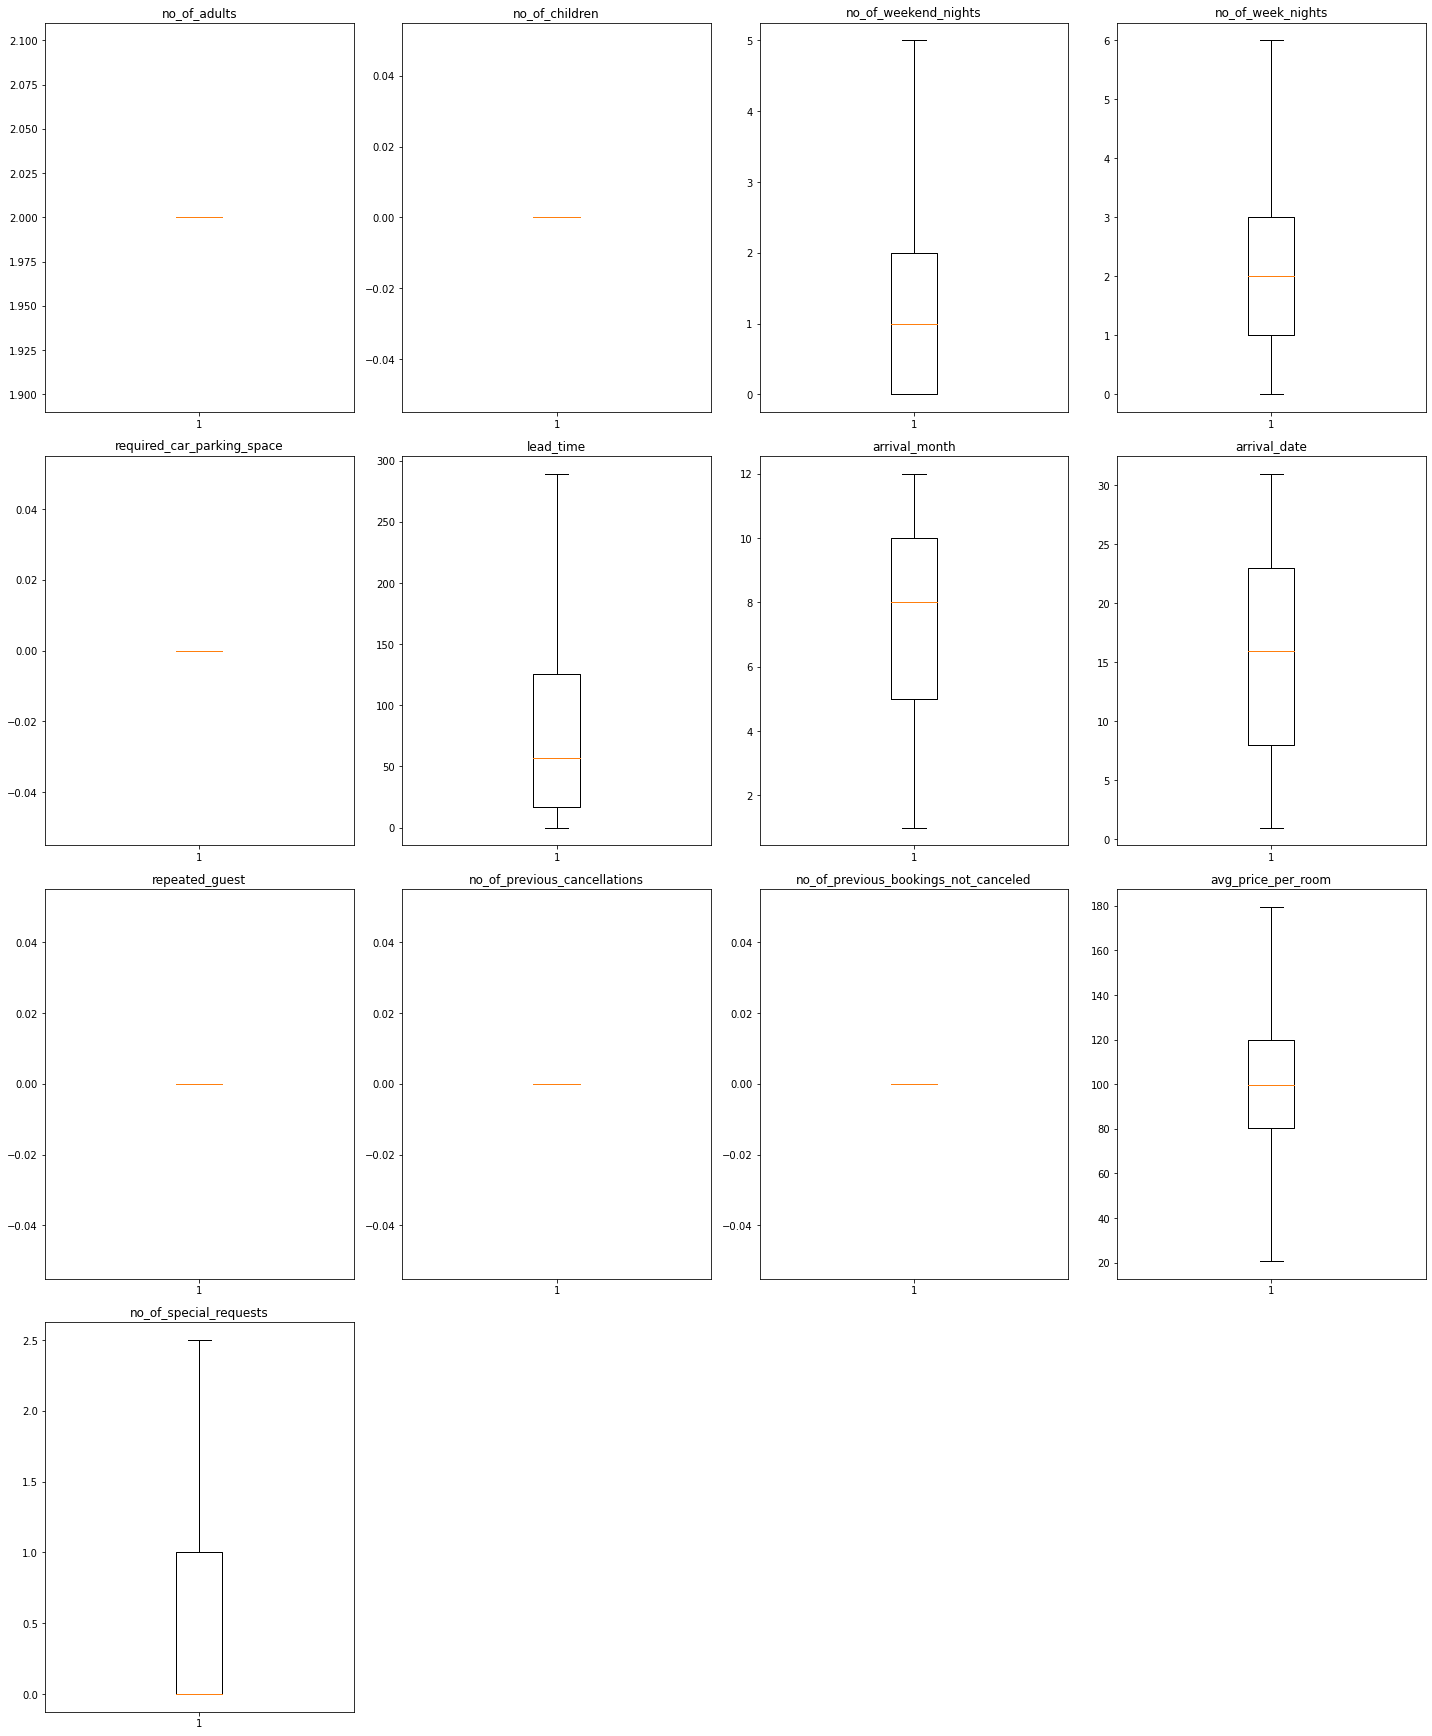

In [46]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [7]:
replaceStruct = {
                "booking_status":     {'Canceled': 1 , "Not_Canceled": 0}  #changing booking values to numerical
}
data=data.replace(replaceStruct)
df1=df1.replace(replaceStruct)

In [184]:
x1 = data.drop(["booking_status","Booking_ID"], axis=1)
y1 = data["booking_status"]  #assigning our variable for our regression

x1 = pd.get_dummies(x, drop_first=True)

# Splitting data in train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x1, y1, test_size=0.30, random_state=1
)

In [110]:
y1.head()

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: int64

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [48]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.0,NaN,NaN,NaN,2.0,0.0,2.0,2.0,2.0,2.0,2.0
no_of_children,36275.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.810117,0.867339,0.0,0.0,1.0,2.0,5.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.177836,1.290622,0.0,1.0,2.0,3.0,6.0
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.0,NaN,NaN,NaN,83.761751,81.656907,0.0,17.0,57.0,126.0,289.5
arrival_year,36275.0,NaN,NaN,NaN,2018.0,0.0,2018.0,2018.0,2018.0,2018.0,2018.0


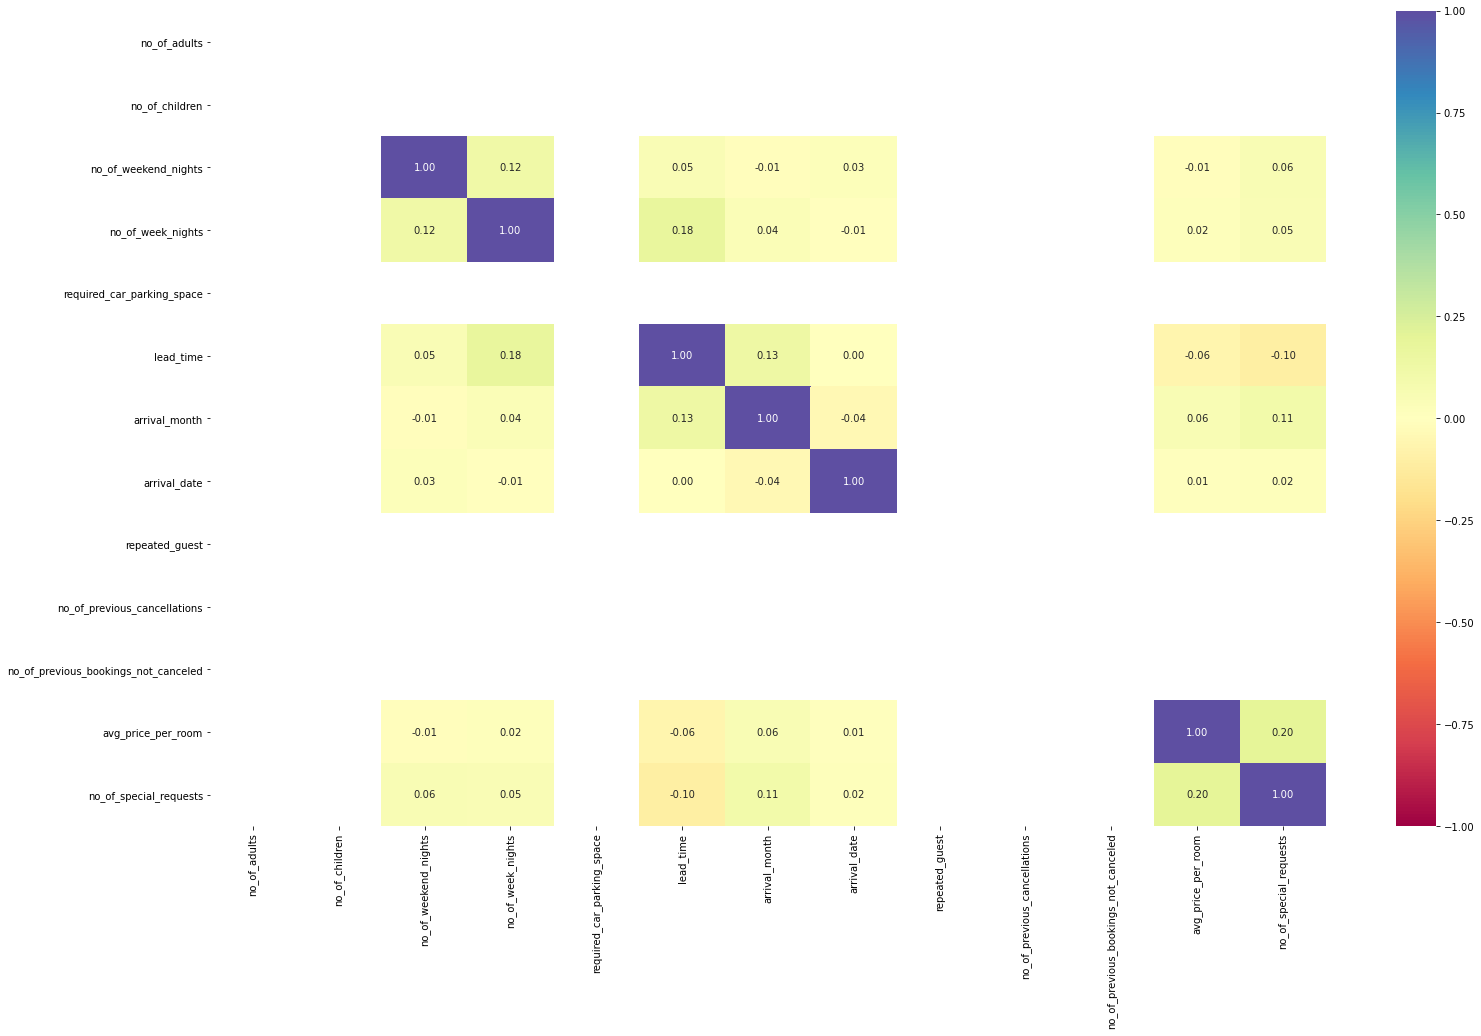

In [49]:
numeric_columns1 = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns1.remove("arrival_year") 

# correlation heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(
    df[numeric_columns1].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

<AxesSubplot:xlabel='arrival_month', ylabel='avg_price_per_room'>

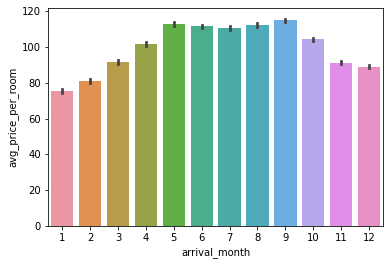

In [50]:
sns.barplot(x='arrival_month',y='avg_price_per_room', data=df) 

<AxesSubplot:xlabel='market_segment_type', ylabel='count'>

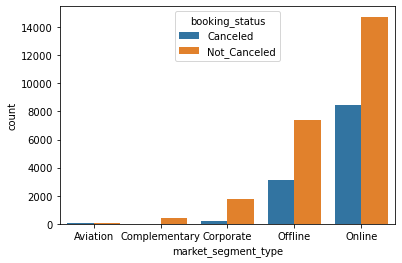

In [51]:
sns.countplot(x='market_segment_type',hue='booking_status', data=df) 

[Text(0.5, 0, 'Number of Special Requests'),
 Text(0, 0.5, 'Avg Price Per Room')]

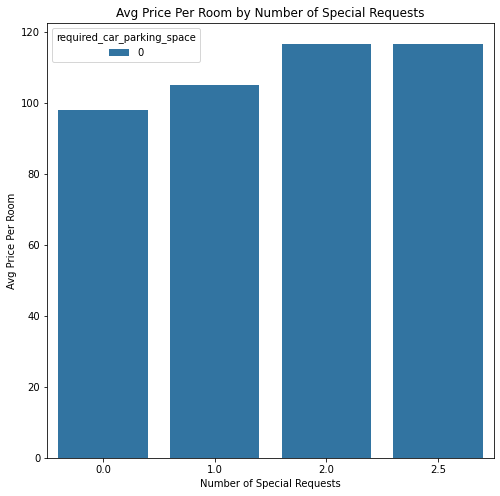

In [52]:
fig, ax = plt.subplots(figsize = (8,8))
ax = sns.barplot(x = 'no_of_special_requests', y = 'avg_price_per_room', data=df, hue = 'required_car_parking_space',ci=None)
ax.set_title("Avg Price Per Room by Number of Special Requests")
ax.set(xlabel = 'Number of Special Requests',ylabel='Avg Price Per Room')

After preprocessing our data, it looks our data did not change very much. The only difference in EDA would be comparing one hot encoded variables to booking status.  In one of the plots, we can clearly see July has the highest avg room price per month.

## Building a Logistic Regression model


In [28]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [27]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Sklearn

In [112]:
x_train, x_test, y_train, y_test = train_test_split(
    x1, y1, test_size=0.30, random_state=1  #splitting our test and training data
)


In [113]:
# The newton-cg solver is faster for high-dimensional data
#defining our model for sklearn log regression

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(x_train, y_train)

In [114]:
# predicting on training set
y_pred_train = lg.predict(x_train)

In [115]:
print("Training set performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))  #we use these metrics to measure model performance

Training set performance:
Accuracy: 0.799306868304978
Precision: 0.729327530534887
Recall: 0.6211885686954443
F1: 0.6709285806534935


## StatsModels

In [125]:
X = data.drop(["booking_status","Booking_ID"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [129]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train)#.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.3293
Time:                        01:27:31   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.389    -687.795
no_of_adults                             0.1135      

C:\Users\devin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [130]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train) #rough first model

Training performance:


,Accuracy,Recall,Precision,F1
0,0.806041,0.634222,0.739749,0.682933


## Checking Multicollinearity
- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [132]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   3.946816e+07
no_of_adults                            1.348154e+00
no_of_children                          1.978229e+00
no_of_weekend_nights                    1.069475e+00
no_of_week_nights                       1.095667e+00
required_car_parking_space              1.039928e+00
lead_time                               1.394914e+00
arrival_year                            1.430830e+00
arrival_month                           1.275673e+00
arrival_date                            1.006738e+00
repeated_guest                          1.783516e+00
no_of_previous_cancellations            1.395689e+00
no_of_previous_bookings_not_canceled    1.651986e+00
avg_price_per_room                      2.050421e+00
no_of_special_requests                  1.247278e+00
type_of_meal_plan_Meal Plan 2           1.271851e+00
type_of_meal_plan_Meal Plan 3           1.025216e+00
type_of_meal_plan_Not Selected          1.272183e+00
room_type_r

In [133]:
X_train1 = X_train.drop("market_segment_type_Online", axis=1)  #dropping high VIF variables
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series1))

Series before feature selection: 

const                                   3.939137e+07
no_of_adults                            1.331784e+00
no_of_children                          1.977350e+00
no_of_weekend_nights                    1.069039e+00
no_of_week_nights                       1.095118e+00
required_car_parking_space              1.039795e+00
lead_time                               1.390637e+00
arrival_year                            1.428376e+00
arrival_month                           1.274625e+00
arrival_date                            1.006721e+00
repeated_guest                          1.780188e+00
no_of_previous_cancellations            1.395447e+00
no_of_previous_bookings_not_canceled    1.651745e+00
avg_price_per_room                      2.049595e+00
no_of_special_requests                  1.242418e+00
type_of_meal_plan_Meal Plan 2           1.271497e+00
type_of_meal_plan_Meal Plan 3           1.025216e+00
type_of_meal_plan_Not Selected          1.270387e+00
room_type_r

In [135]:
logit2 = sm.Logit(y_train, X_train1)
lg2 = logit2.fit()

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train1, y_train) #log regression model in statsmodel

         Current function value: 0.425084
         Iterations: 35
Training performance:


C:\Users\devin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Accuracy,Recall,Precision,F1
0,0.805766,0.633744,0.739294,0.682462


In [149]:
print(lg2.summary()) #tells us our summary stats of second statsmodel

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.3292
Time:                        01:40:35   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -933.3324    120.656     -7.736      0.000   -1169.813    -696.852
no_of_adults                             0.1060      

You can see we have a few variables that have P-values greater than 0.05, so we must drop them from the model.

In [154]:
X_train3 = X_train2.drop(
    ["arrival_date"], axis=1
)

logit4 = sm.Logit(y_train, X_train3)     #dropping missed high p-value
lg4 = logit4.fit()

print(lg4.summary()) #rebuilding model and printing it

Optimization terminated successfully.
         Current function value: 0.425677
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.3283
Time:                        01:43:42   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615    

In [155]:
# converting coefficients to odds
odds = np.exp(lg4.params)

# finding the percentage change
perc_change_odds = (np.exp(lg4.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.0,1.114754,1.164360,1.114753,1.042636,0.203048,1.015835,1.573235,0.958528,0.064797,1.257157,1.019348,0.229941,1.179916,1.330892,0.700461,0.753830,0.479403,0.380991,0.239033,0.452584,0.167504
Change_odd%,-100.0,11.475363,16.436009,11.475256,4.263629,-79.695231,1.583521,57.323511,-4.147245,-93.520258,25.715665,1.934790,-77.005947,17.991562,33.089244,-29.953888,-24.617006,-52.059666,-61.900934,-76.096691,-54.741616,-83.249628


### Insights
Holding all else constant, having a required parking space, being a repeated guest, being in the offline market segment, and having alot of special requests severely increase your odds of not canceling your booking. While having a later arrival year, no meal plan selected, having alot of previous cancellations, and having children increases your odds of cancelling.  

Since these are logistic odds, the change in data isnt the same as linear regression. An example of how the data affects the number of cancellation is a 1 unit increase in number of speical requests will decrease the odds of a person cancelling by 77%.

## Model performance evaluation

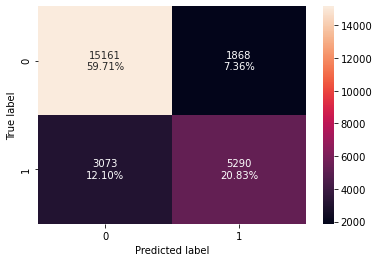

In [158]:
confusion_matrix_statsmodels(lg4, X_train3, y_train)

In [159]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg4, X_train3, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805411,0.632548,0.739033,0.681657


## ROC-AUC

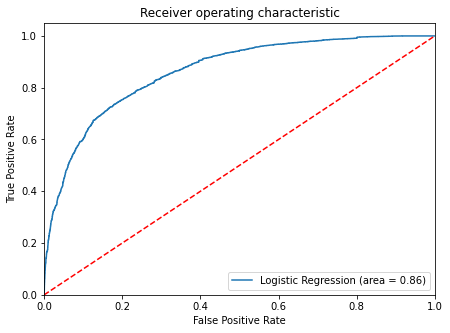

In [160]:
logit_roc_auc_train = roc_auc_score(y_train, lg4.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg4.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Shows our model has given a good perofmance on the training set.

In [188]:
fpr, tpr, thresholds = roc_curve(y_train, lg4.predict(X_train3)) #calculates the optimal threshold auc

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.374520986


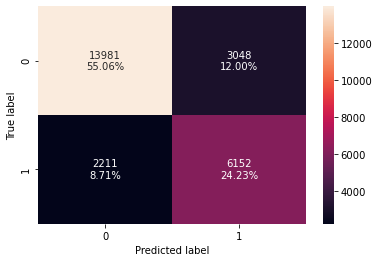

In [162]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg4, X_train3, y_train, threshold=optimal_threshold_auc_roc
)

In [163]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg4, X_train3, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.792888,0.735621,0.668696,0.700564


This decreased our precison, but increased our recall and F1 stat

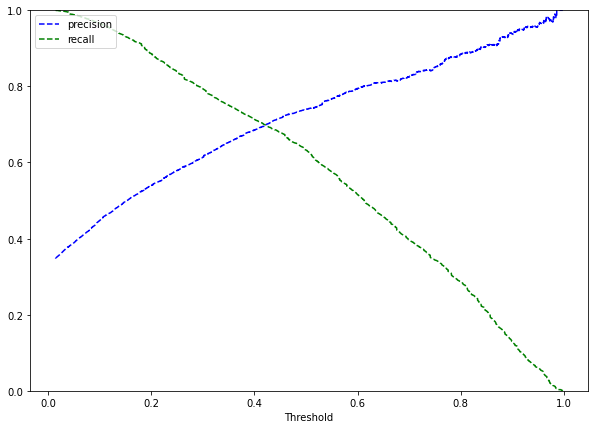

In [164]:
y_scores = lg4.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [165]:
# setting the threshold
optimal_threshold_curve = 0.45

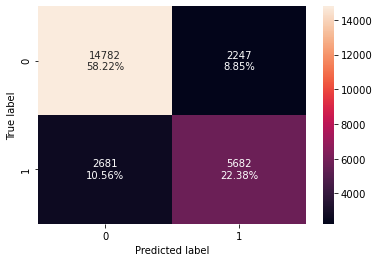

In [166]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_train3, y_train, threshold=optimal_threshold_curve)

In [167]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg4, X_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805923,0.679421,0.71661,0.69752


Using the optimal threshold, our precision incresaed, but F stat and recall dropped.

In [181]:
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.45 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.37 Threshold,Logistic Regression-0.45 Threshold
Accuracy,0.805411,0.792888,0.805923
Recall,0.632548,0.735621,0.679421
Precision,0.739033,0.668696,0.716610
F1,0.681657,0.700564,0.697520


## Test Set 

In [171]:
X_test3 = X_test[list(X_train3.columns)]

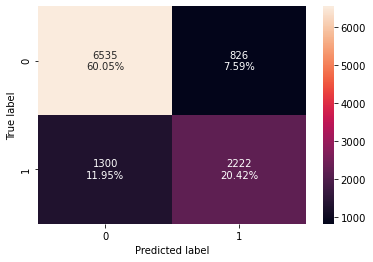

In [172]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_test3, y_test)

In [173]:
log_reg_model_test_perf = model_performance_classification_statsmodels( #model performance on test
    lg4, X_test3, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.804649,0.630892,0.729003,0.676408


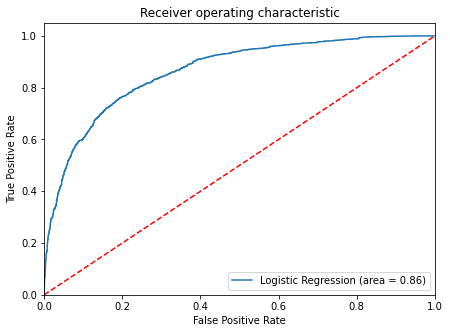

In [174]:
logit_roc_auc_train = roc_auc_score(y_test, lg4.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg4.predict(X_test3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

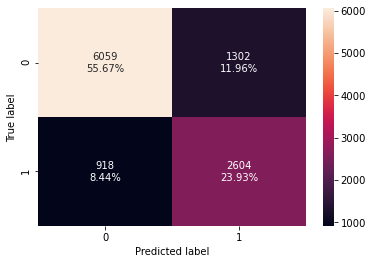

In [175]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_test3, y_test, threshold=optimal_threshold_auc_roc)

In [177]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg4, X_test3, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.796012,0.739353,0.666667,0.701131


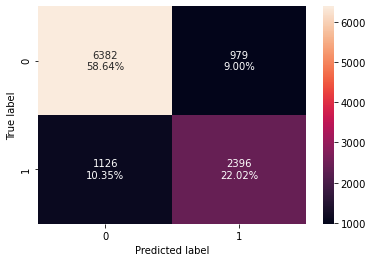

In [178]:
confusion_matrix_statsmodels(lg4, X_test3, y_test, threshold=optimal_threshold_curve)

In [179]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg4, X_test3, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.806579,0.680295,0.709926,0.694795


## Final Model Summary

In [180]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.45 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.37 Threshold,Logistic Regression-0.45 Threshold
Accuracy,0.805411,0.792888,0.805923
Recall,0.632548,0.735621,0.679421
Precision,0.739033,0.668696,0.716610
F1,0.681657,0.700564,0.697520


The 0.37 threshold seemed to work the best for the model, and the model overall worked well to model the data. Although Sklearn was the easiest to use, it gave the worst model for our data as the recall was very low.

## Building a Decision Tree model

In [6]:
df1 = df.copy() #copy data set 

In [8]:
df1['booking_status']=df1['booking_status'].astype(int) #changing value of booking status to int

In [9]:
df1.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


In [10]:
X = df1.drop(["booking_status","Booking_ID"], axis=1)
y = df1.pop("booking_status") #assigns our variables

In [11]:
X = pd.get_dummies(X, drop_first=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [13]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1) #decicion tree classifier
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [14]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  0.994210775047259
Accuracy on test set :  0.8710833409905357


In [15]:
#Checking number of positives
y.sum(axis = 0)

11885

In [25]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

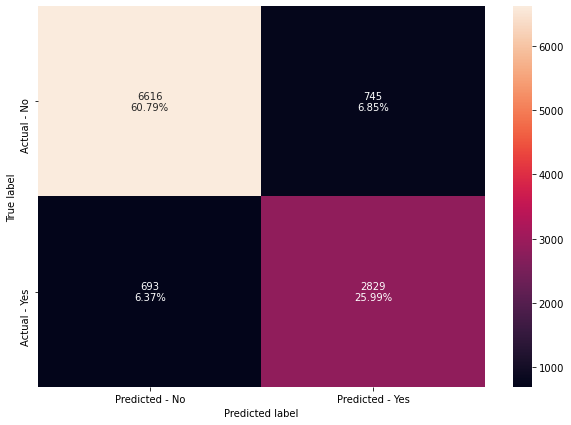

In [228]:
make_confusion_matrix(dTree,y_test) #confusion matrix function

In [18]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  0.9866076766710511
Recall on test set :  0.8103350369108461


In [19]:
feature_names = list(X.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


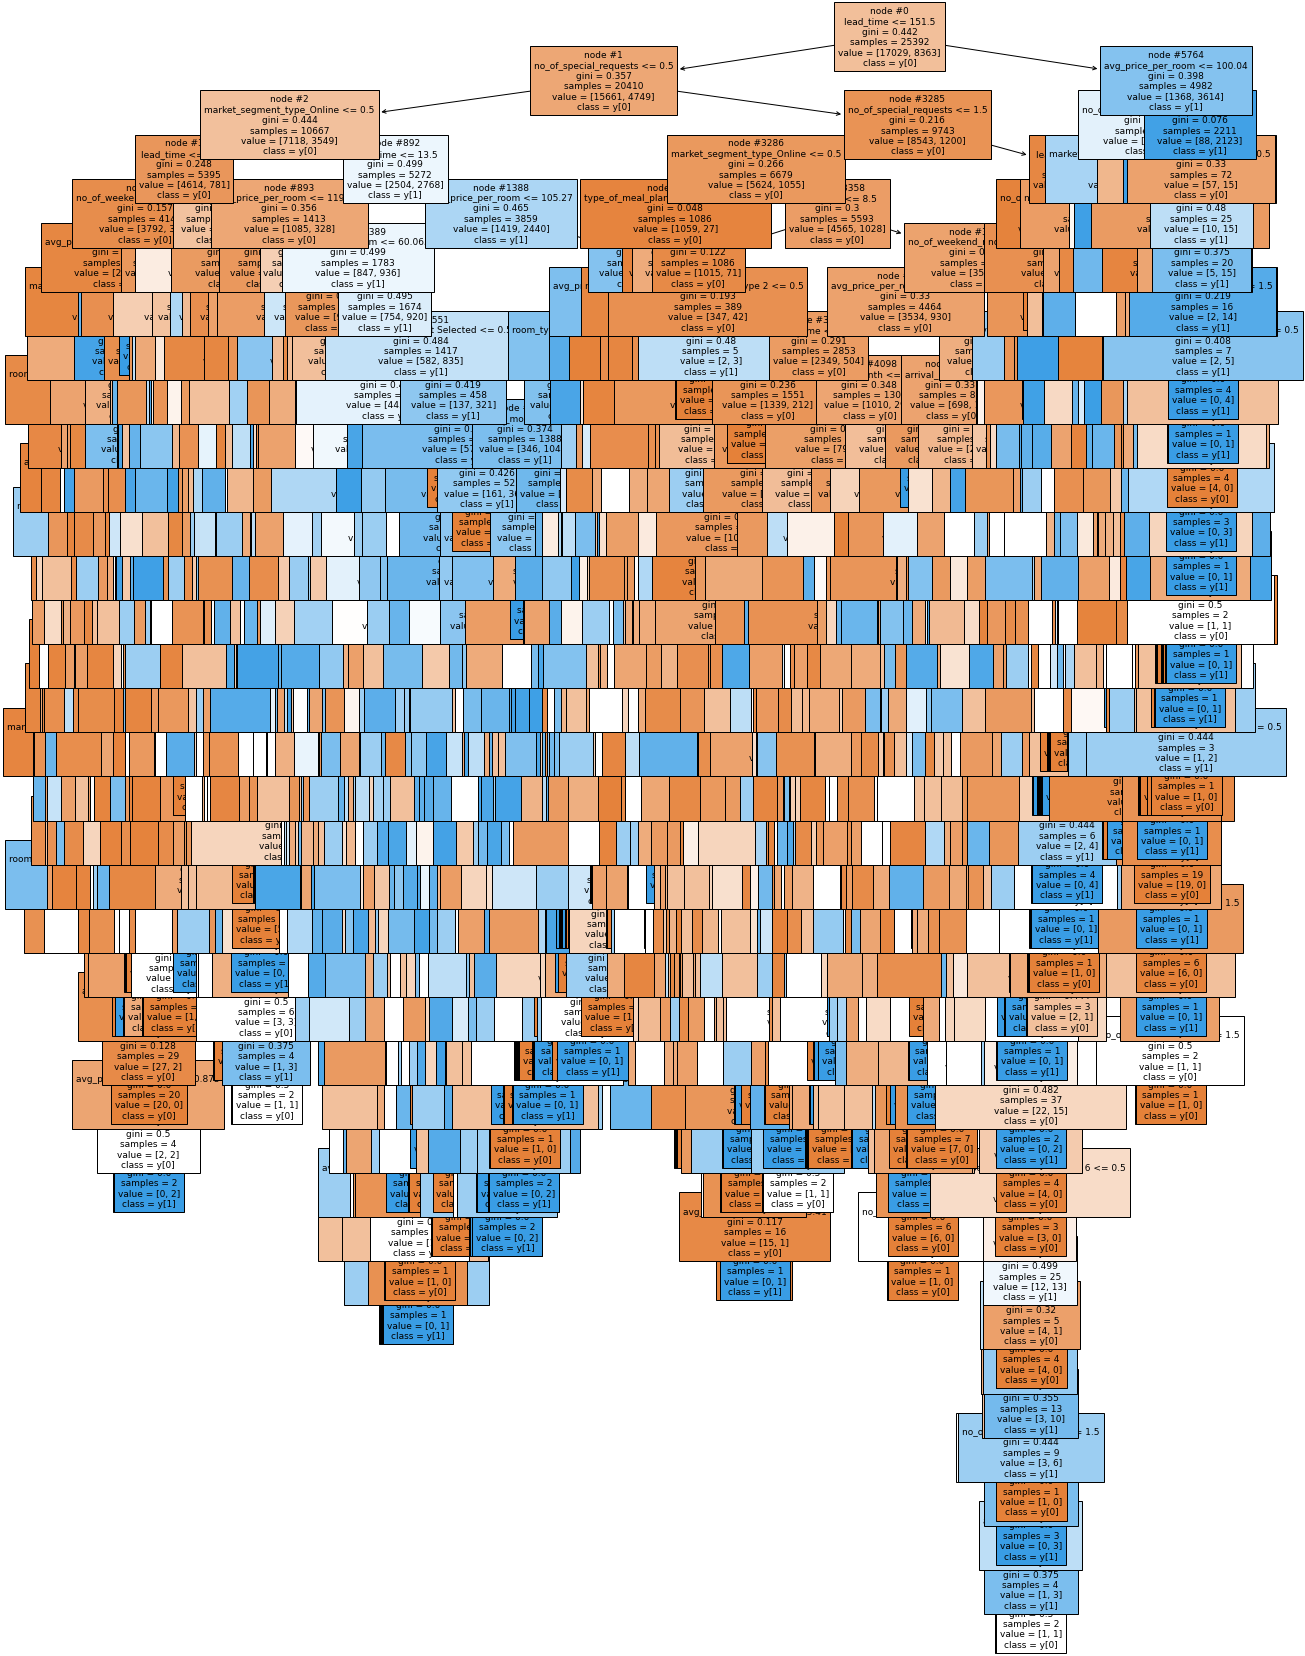

In [233]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [20]:
# importance of features in the tree building 
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.350353
avg_price_per_room                    0.177265
market_segment_type_Online            0.092345
arrival_date                          0.085259
no_of_special_requests                0.067948
arrival_month                         0.064570
no_of_week_nights                     0.045395
no_of_weekend_nights                  0.038528
no_of_adults                          0.027482
arrival_year                          0.011793
type_of_meal_plan_Not Selected        0.008234
room_type_reserved_Room_Type 4        0.006904
required_car_parking_space            0.006878
market_segment_type_Offline           0.003927
type_of_meal_plan_Meal Plan 2         0.003704
no_of_children                        0.003672
room_type_reserved_Room_Type 5        0.001681
room_type_reserved_Room_Type 2        0.001486
market_segment_type_Corporate         0.000646
repeated_guest                        0.000601
room_type_res

In [21]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1) #max depth 3 tree
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

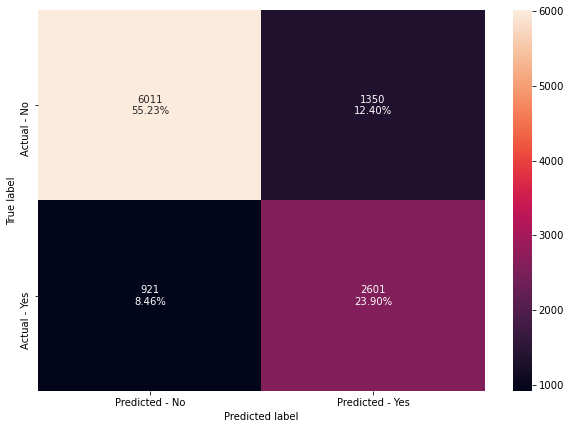

In [22]:
make_confusion_matrix(dTree1, y_test)

In [23]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.7844202898550725
Accuracy on test set :  0.7913259211614444
Recall on training set :  0.7315556618438359
Recall on test set :  0.7385008517887564


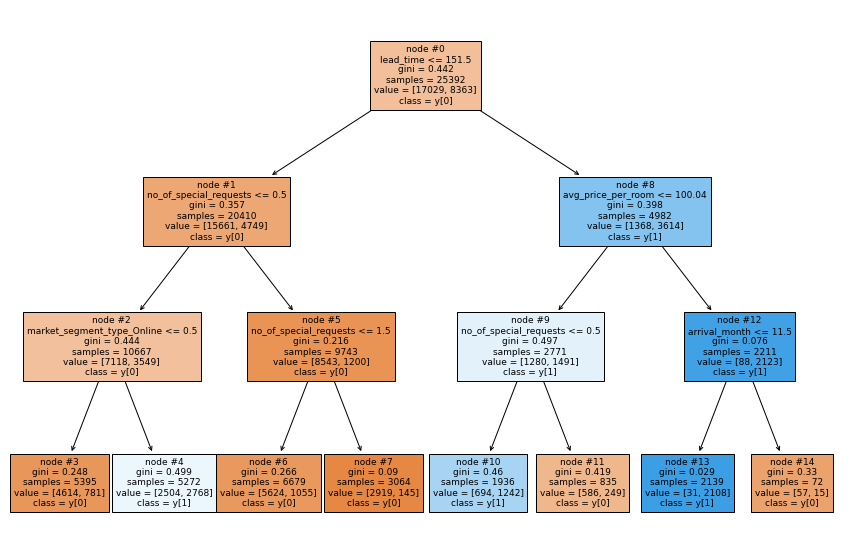

In [30]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [239]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.501907
market_segment_type_Online            0.199054
no_of_special_requests                0.164194
avg_price_per_room                    0.113125
arrival_month                         0.021719
no_of_week_nights                     0.000000
type_of_meal_plan_Not Selected        0.000000
market_segment_type_Offline           0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 4        0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_reserved_Room_Type 2        0.000000
type_of_meal_plan_Meal Plan 3         0.000000
required_car_parking_space            0.000000
type_of_meal_plan_Meal Plan 2         0.000000
no_of_children                        0.000000
no_of_previou

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, random_state=1)

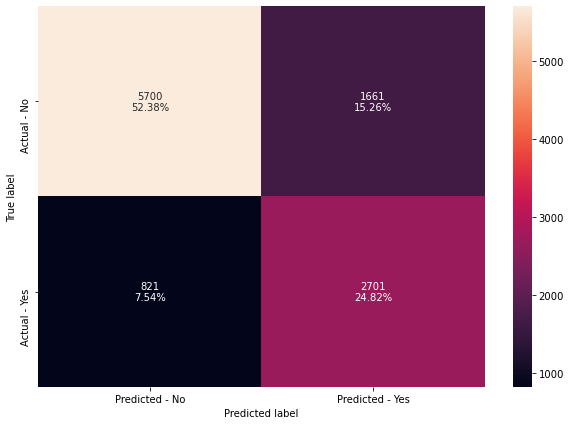

In [33]:
make_confusion_matrix(estimator,y_test)

In [34]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.7694943289224953
Accuracy on test set :  0.7719378847744188
Recall on training set :  0.7631232811192156
Recall on test set :  0.7668938103350369


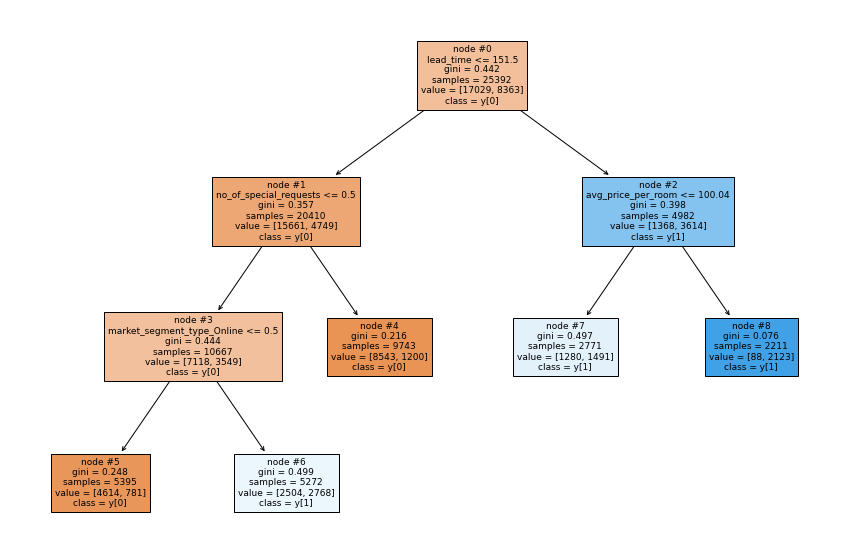

In [35]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [36]:
# importance of features in the tree building 

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                                           Imp
lead_time                             0.539970
market_segment_type_Online            0.214150
no_of_special_requests                0.124176
avg_price_per_room                    0.121704
no_of_week_nights                     0.000000
type_of_meal_plan_Not Selected        0.000000
market_segment_type_Offline           0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 4        0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_reserved_Room_Type 2        0.000000
type_of_meal_plan_Meal Plan 3         0.000000
required_car_parking_space            0.000000
type_of_meal_plan_Meal Plan 2         0.000000
no_of_children                        0.000000
no_of_previous_bookings_not_canceled  0.000000
no_of_previou

## Do we need to prune the tree?

In [37]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [38]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.007572
1,4.327745e-07,0.007573
2,4.688391e-07,0.007573
3,5.329960e-07,0.007574
4,6.133547e-07,0.007575
...,...,...
1340,6.665684e-03,0.286897
1341,1.304480e-02,0.299942
1342,1.725993e-02,0.317202
1343,2.399048e-02,0.365183


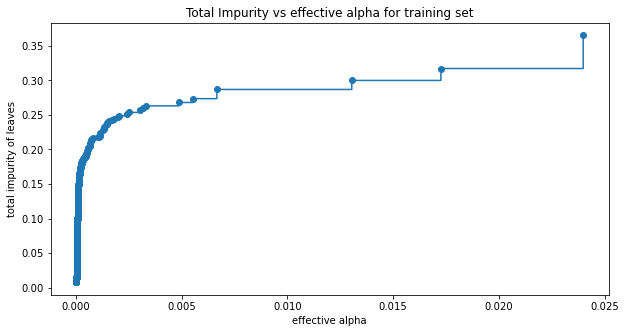

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [40]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07657789477371368


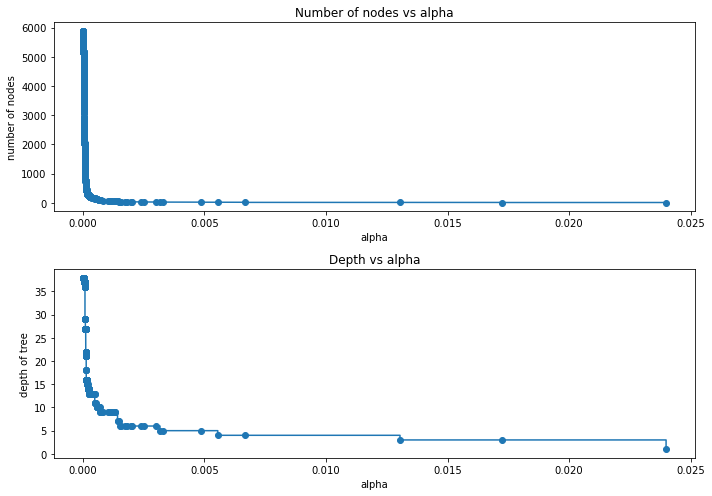

In [41]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [42]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]


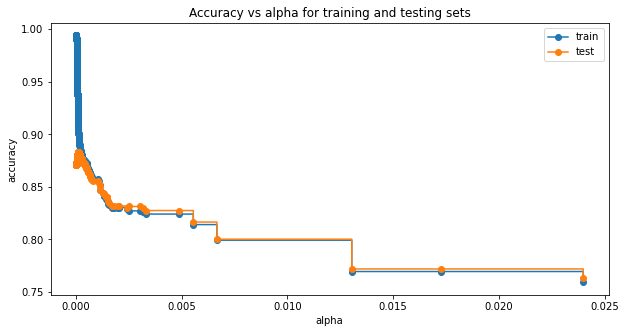

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [44]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.00011736595788977046, random_state=1)
Training accuracy of best model:  0.9029615626969124
Test accuracy of best model:  0.883304235964348


In [45]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [46]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

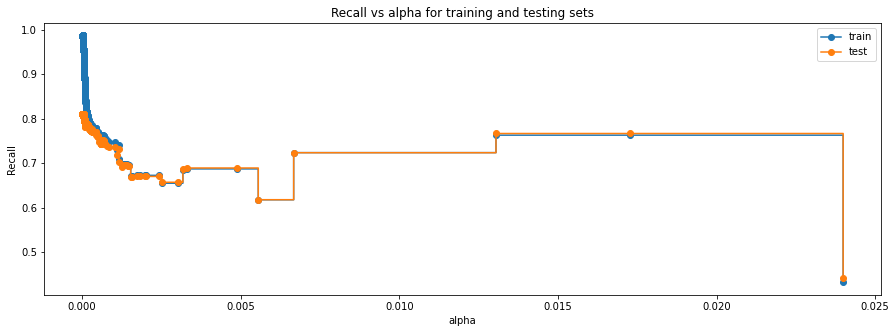

In [47]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

Alphas for training and test sets are very similar

In [48]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=1.3127494223902537e-05, random_state=1)


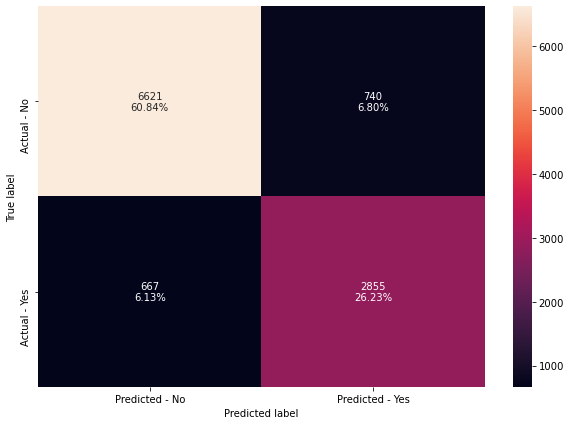

In [49]:
make_confusion_matrix(best_model,y_test)

In [50]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.9874446968791104
Recall on test set :  0.8106189664963089


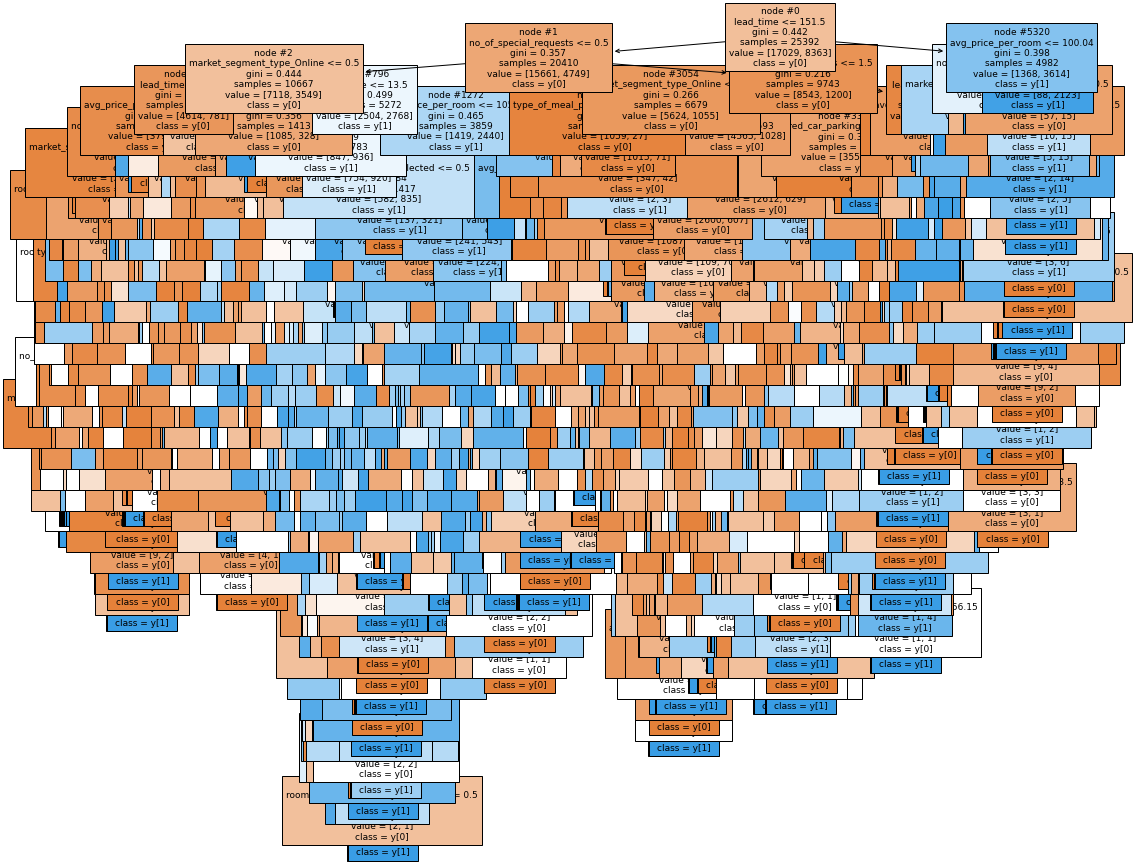

In [51]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [52]:
# importance of features in the tree building

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.350578
avg_price_per_room                    0.177126
market_segment_type_Online            0.092470
arrival_date                          0.085152
no_of_special_requests                0.068010
arrival_month                         0.064615
no_of_week_nights                     0.045274
no_of_weekend_nights                  0.038511
no_of_adults                          0.027410
arrival_year                          0.011776
type_of_meal_plan_Not Selected        0.008245
room_type_reserved_Room_Type 4        0.006914
required_car_parking_space            0.006888
market_segment_type_Offline           0.003925
type_of_meal_plan_Meal Plan 2         0.003709
no_of_children                        0.003647
room_type_reserved_Room_Type 5        0.001683
room_type_reserved_Room_Type 2        0.001488
market_segment_type_Corporate         0.000647
repeated_guest                        0.000602
room_type_res

In [3]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[1,0.73,0.77,0.99], 'Test_Recall':[0.81,0.74,0.76,0.81]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.81
1,Decision tree with restricted maximum depth,0.73,0.74
2,Decision treee with hyperparameter tuning,0.77,0.76
3,Decision tree with post-pruning,0.99,0.81


## Model Performance Comparison and Conclusions

Our tree with the highest recall was post-pruning with a test recall of 0.81 which ended up being the same as our initial tree. Pruning was still necessary to ensure that we had our best model for the decision tree.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

Lead time is the biggest driving variable behind cancellations, the hotel could adopt policies that have maximum timeframe set for how long in advance a party could book. Or they could require a cancellation fee calculated on how long the lead time was.The second biggest driving variable was price of the room. Again, I would recommend the hotel to charge a cancel fee based off of lead time and average price factored in. Booking online, having a late arrival date, how many adults are in the party, number of special requests, and number of nights are also smaller driving variables behind cancellations.